In [2]:
!pip3 install seaborn

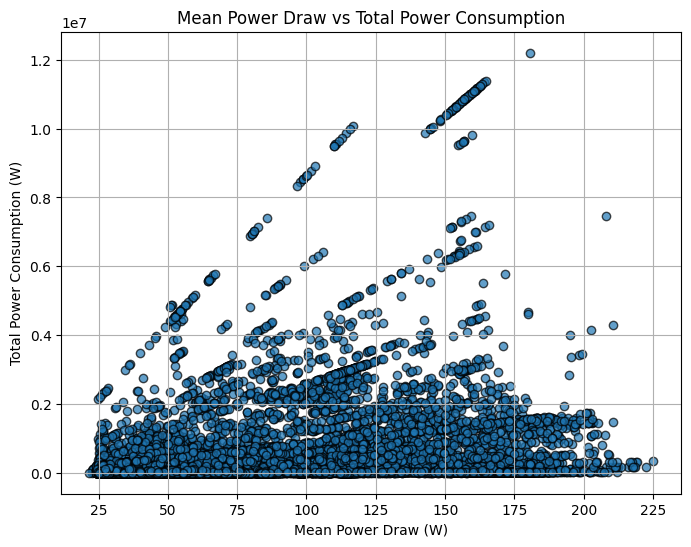

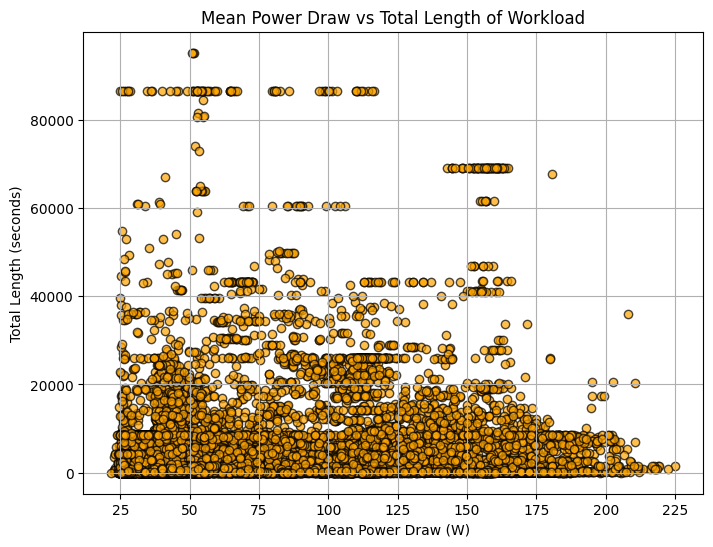

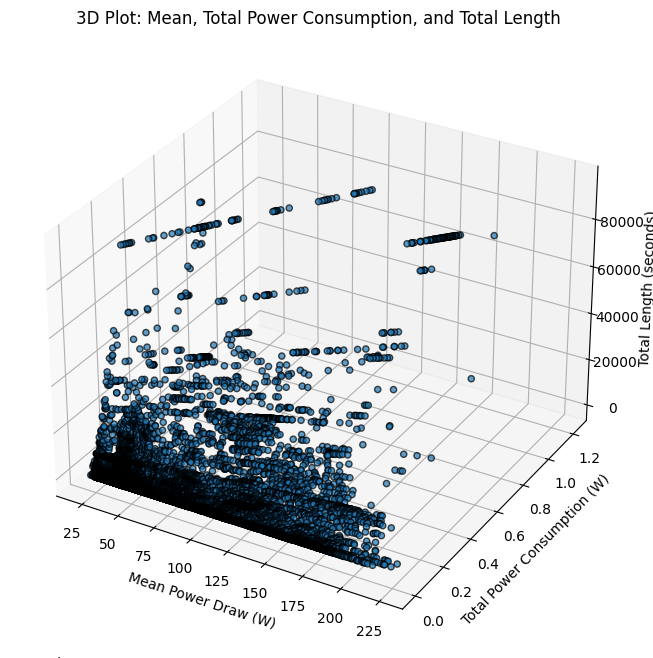

Correlation Matrix:
                             mean  total_power_consumption  \
mean                     1.000000                 0.311775   
total_power_consumption  0.311775                 1.000000   
total_length_seconds     0.132048                 0.883442   

                         total_length_seconds  
mean                                 0.132048  
total_power_consumption              0.883442  
total_length_seconds                 1.000000  


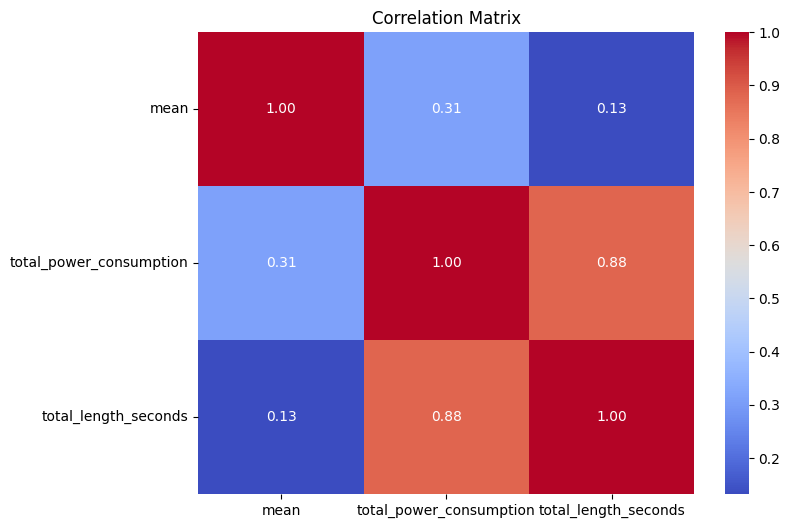

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Step 1: Load and Combine CSV Files
directory = '../filtered_workloads_1s_stats'
all_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('_stats.csv')]

# Combine all files into a single DataFrame
combined_df = pd.concat([pd.read_csv(file) for file in all_files], ignore_index=True)

# Step 2: Filter for 'power_draw_W'
power_draw_data = combined_df[combined_df['column_name'] == 'power_draw_W']

# Step 3: Scatter Plot - Mean vs Total Power Consumption
plt.figure(figsize=(8, 6))
plt.scatter(power_draw_data['mean'], power_draw_data['total_power_consumption'], alpha=0.7, edgecolor='k')
plt.title("Mean Power Draw vs Total Power Consumption")
plt.xlabel("Mean Power Draw (W)")
plt.ylabel("Total Power Consumption (W)")
plt.grid(True)
plt.show()

# Step 4: Scatter Plot - Mean vs Total Length of Workload
plt.figure(figsize=(8, 6))
plt.scatter(power_draw_data['mean'], power_draw_data['total_length_seconds'], alpha=0.7, color='orange', edgecolor='k')
plt.title("Mean Power Draw vs Total Length of Workload")
plt.xlabel("Mean Power Draw (W)")
plt.ylabel("Total Length (seconds)")
plt.grid(True)
plt.show()

# Step 5: 3D Scatter Plot - Mean, Total Power Consumption, and Total Length
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(
    power_draw_data['mean'], 
    power_draw_data['total_power_consumption'], 
    power_draw_data['total_length_seconds'], 
    alpha=0.7, edgecolor='k'
)
ax.set_title("3D Plot: Mean, Total Power Consumption, and Total Length")
ax.set_xlabel("Mean Power Draw (W)")
ax.set_ylabel("Total Power Consumption (W)")
ax.set_zlabel("Total Length (seconds)")
plt.show()

# Step 6: Correlation Matrix
# Select relevant columns
relevant_columns = power_draw_data[['mean', 'total_power_consumption', 'total_length_seconds']]

# Compute correlation matrix
correlation_matrix = relevant_columns.corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
The heatmap shows the correlation matrix for the selected features (mean, total_power_consumption, and total_length_seconds). Here's how to interpret it:
Observations:
Strong correlation between total_power_consumption and total_length_seconds:
The value 0.88 indicates a strong positive correlation, suggesting that longer workloads result in higher total power consumption.
Moderate correlation between mean and total_power_consumption:
The value 0.31 indicates a moderate positive correlation. This suggests that workloads with higher average power draw also tend to have higher total power consumption, but the relationship is not as strong.
Weak correlation between mean and total_length_seconds:
The value 0.13 indicates a weak positive correlation. This suggests that average power draw is not strongly related to the duration of the workload.
Next Steps:
If you want deeper insights, consider:
Visualizing distributions: Use histograms or kernel density estimates for mean, total_power_consumption, and total_length_seconds to understand their individual distributions.
Regression Analysis: Perform regression analysis to model the relationships between these variables quantitatively.
Cluster Analysis: Identify distinct patterns or clusters in your data (e.g., workloads with high power draw but short duration).
Would you like assistance with any of these analyses or further visualizations?